In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [45]:
import numpy as np
np.random.seed(42)
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,GlobalMaxPooling1D,Input
from tensorflow.keras.optimizers import SGD

In [2]:
#np.save('../data/hoda_np_resized.npy',data_resized)
#np.save('../data/hoda_np_labels.npy',labels)
hoda = np.load('../data/hoda_np_resized.npy')
labels = np.load('../data/hoda_np_labels.npy')

### استفاده از دیتاست های تنسورفلو

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(hoda, labels)

dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))

#hoda_tf_dataset = 

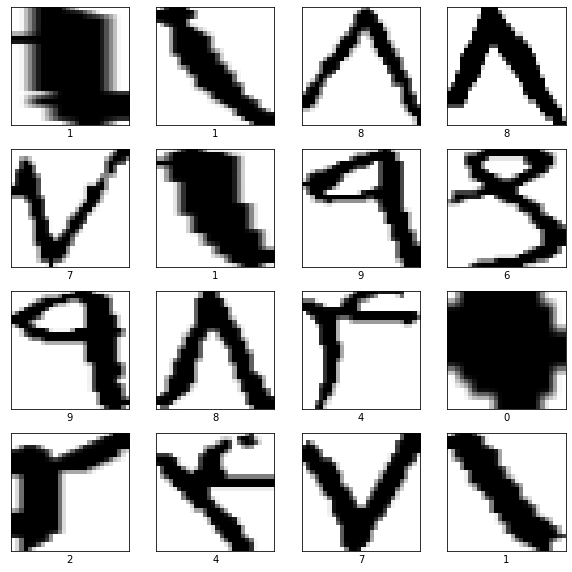

In [55]:
plt.figure(figsize = (10,10))
for i,(img ,target) in enumerate(dataset.take(16)):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img.numpy(), cmap=plt.cm.binary)
    plt.xlabel(target.numpy())
plt.show()

In [56]:
dataset = dataset.batch(16)

In [57]:
print(dataset.element_spec)

(TensorSpec(shape=(None, 28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))


حالا به تنسورفلو می گوییم که دیتاست را 10 بار تکرار کن (10 ایپاک ایجاد کن)

In [58]:
dataset = dataset.repeat(10)

نباید یادمان برود که داده ها را نرمال سازی کنیم.

In [59]:
def normalize_image(image, label):
      return tf.cast(image, tf.float32) / 255., label

def expand_dims(image,label):
    return tf.expand_dims(image,axis = 3), label
dataset = dataset.map(expand_dims)
dataset = dataset.map(normalize_image)

In [60]:
dataset.element_spec


(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.uint8, name=None))

In [61]:
model = Sequential()
#model.add(Input(28,28,1))
model.add(Conv2D(32,kernel_size = 3,padding = 'same',input_shape = (28,28,1),activation = 'relu'))
model.add(Flatten())
model.add(Dense(50,activation = 'sigmoid', ))
model.add(Dense(50,activation = 'sigmoid'))
model.add(Dense(50,activation = 'sigmoid'))
model.add(Dense(10, activation='softmax'))

In [62]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [63]:
model.fit(dataset, epochs=30,verbose = 1)

Epoch 1/30
28130/28130 [==============================] - 351s 12ms/step - loss: 0.0434 - accuracy: 0.9911s - loss: 0.0435 
Epoch 2/30
28130/28130 [==============================] - 327s 12ms/step - loss: 0.0012 - accuracy: 0.9996
Epoch 3/30
28130/28130 [==============================] - 268s 10ms/step - loss: 1.2782e-06 - accuracy: 1.0000
Epoch 4/30
28130/28130 [==============================] - 258s 9ms/step - loss: 4.9286e-09 - accuracy: 1.0000
Epoch 5/30
28130/28130 [==============================] - 323s 11ms/step - loss: 2.5347e-09 - accuracy: 1.0000
Epoch 6/30
28130/28130 [==============================] - 269s 10ms/step - loss: 1.9646e-09 - accuracy: 1.0000
Epoch 7/30
28130/28130 [==============================] - 252s 9ms/step - loss: 1.7908e-09 - accuracy: 1.0000
Epoch 8/30
28130/28130 [==============================] - 251s 9ms/step - loss: 1.7775e-09 - accuracy: 1.00000s - loss: 1.7717e-09 - ac
Epoch 9/30
28130/28130 [==============================] - 258s 9ms/step - loss: 

In [81]:
model.evaluate(X_test,y_test_cat)

469/469 [==============================] - 2s 3ms/step - loss: 0.0443 - accuracy: 0.9913


[0.044267427176237106, 0.991266667842865]

In [97]:
preds_probs = model.predict(X_test)
preds = np.argmax(preds_probs, axis=-1)


In [98]:
preds,preds_probs

(array([0, 0, 2, ..., 8, 2, 6], dtype=int64),
 array([[9.9998188e-01, 5.1422958e-06, 8.4777137e-11, ..., 3.4669772e-06,
         7.8152522e-07, 1.9801639e-06],
        [9.7673994e-01, 2.2964315e-02, 1.6547958e-07, ..., 5.7935908e-05,
         2.2982036e-05, 5.3958087e-05],
        [8.5847267e-11, 1.6241465e-06, 9.9996197e-01, ..., 1.5679245e-06,
         3.1536379e-06, 1.5914221e-08],
        ...,
        [7.5249693e-07, 1.1581375e-06, 1.2111079e-06, ..., 1.2185440e-09,
         9.9998367e-01, 2.0817070e-06],
        [2.0881664e-10, 3.4258096e-06, 9.9998236e-01, ..., 2.1551343e-06,
         1.3790136e-06, 4.4301718e-09],
        [4.8530964e-08, 3.2566491e-06, 3.2483333e-06, ..., 1.8389753e-06,
         1.8946221e-08, 2.1458279e-06]], dtype=float32))

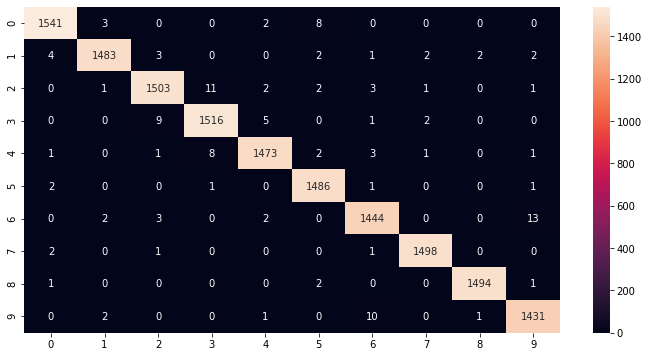

In [94]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (12,6))
sns.heatmap(confusion_matrix(preds,y_test),annot = True,fmt='g')

In [104]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

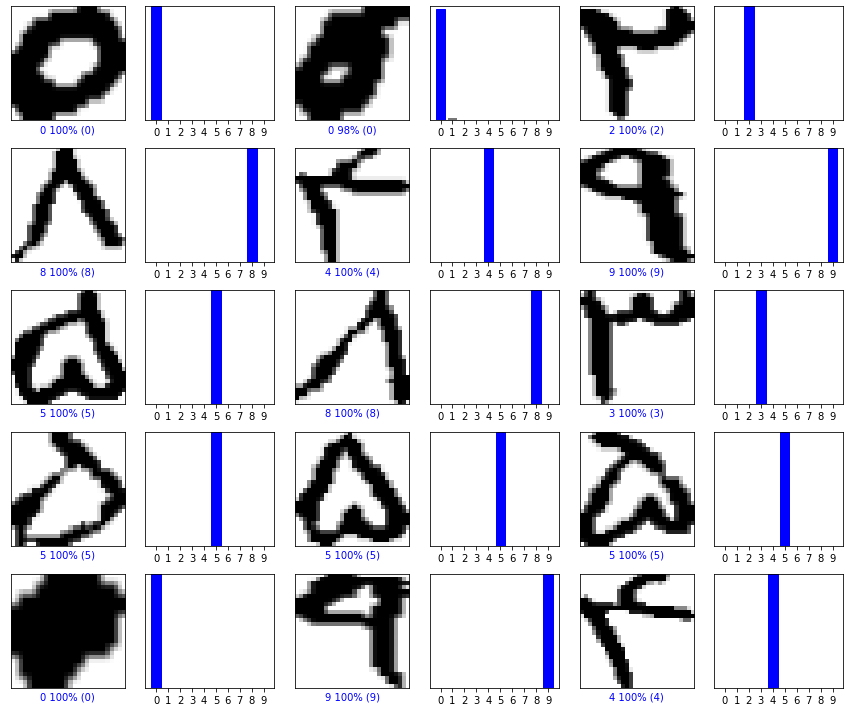

In [106]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, preds_probs[i], y_test, X_test.reshape(15000,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, preds_probs[i], y_test)
plt.tight_layout()
plt.show()

In [75]:
y_test

array([5, 8, 1, ..., 8, 1, 9], dtype=uint8)